<a href="https://colab.research.google.com/github/weilainicolas/Deep-Learning/blob/master/Starry_night.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.vision.gan import *

In [57]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving starry_night.csv to starry_night.csv
User uploaded file "starry_night.csv" with length 32949 bytes


In [0]:
dest=Path('/content/starry_night')
dest.mkdir(parents=True,exist_ok=True)

In [59]:
download_images('starry_night.csv',dest)

In [61]:
verify_images(dest,delete=True)

In [0]:
il=GANItemList.from_folder(dest,noise_sz=128)

In [0]:
bs,size=(64,128)

In [0]:
data=(il.split_none()
      .label_from_func(noop)
      .transform(tfms=None, size=size, tfm_y= True) #[crop_pad(size=size,row_pct=(0,1),col_pct=(0,1)),[]],size=size, tfm_y=True)
      .databunch(bs=bs)
      .normalize(stats= [torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5])], do_x=False, do_y = True)
)

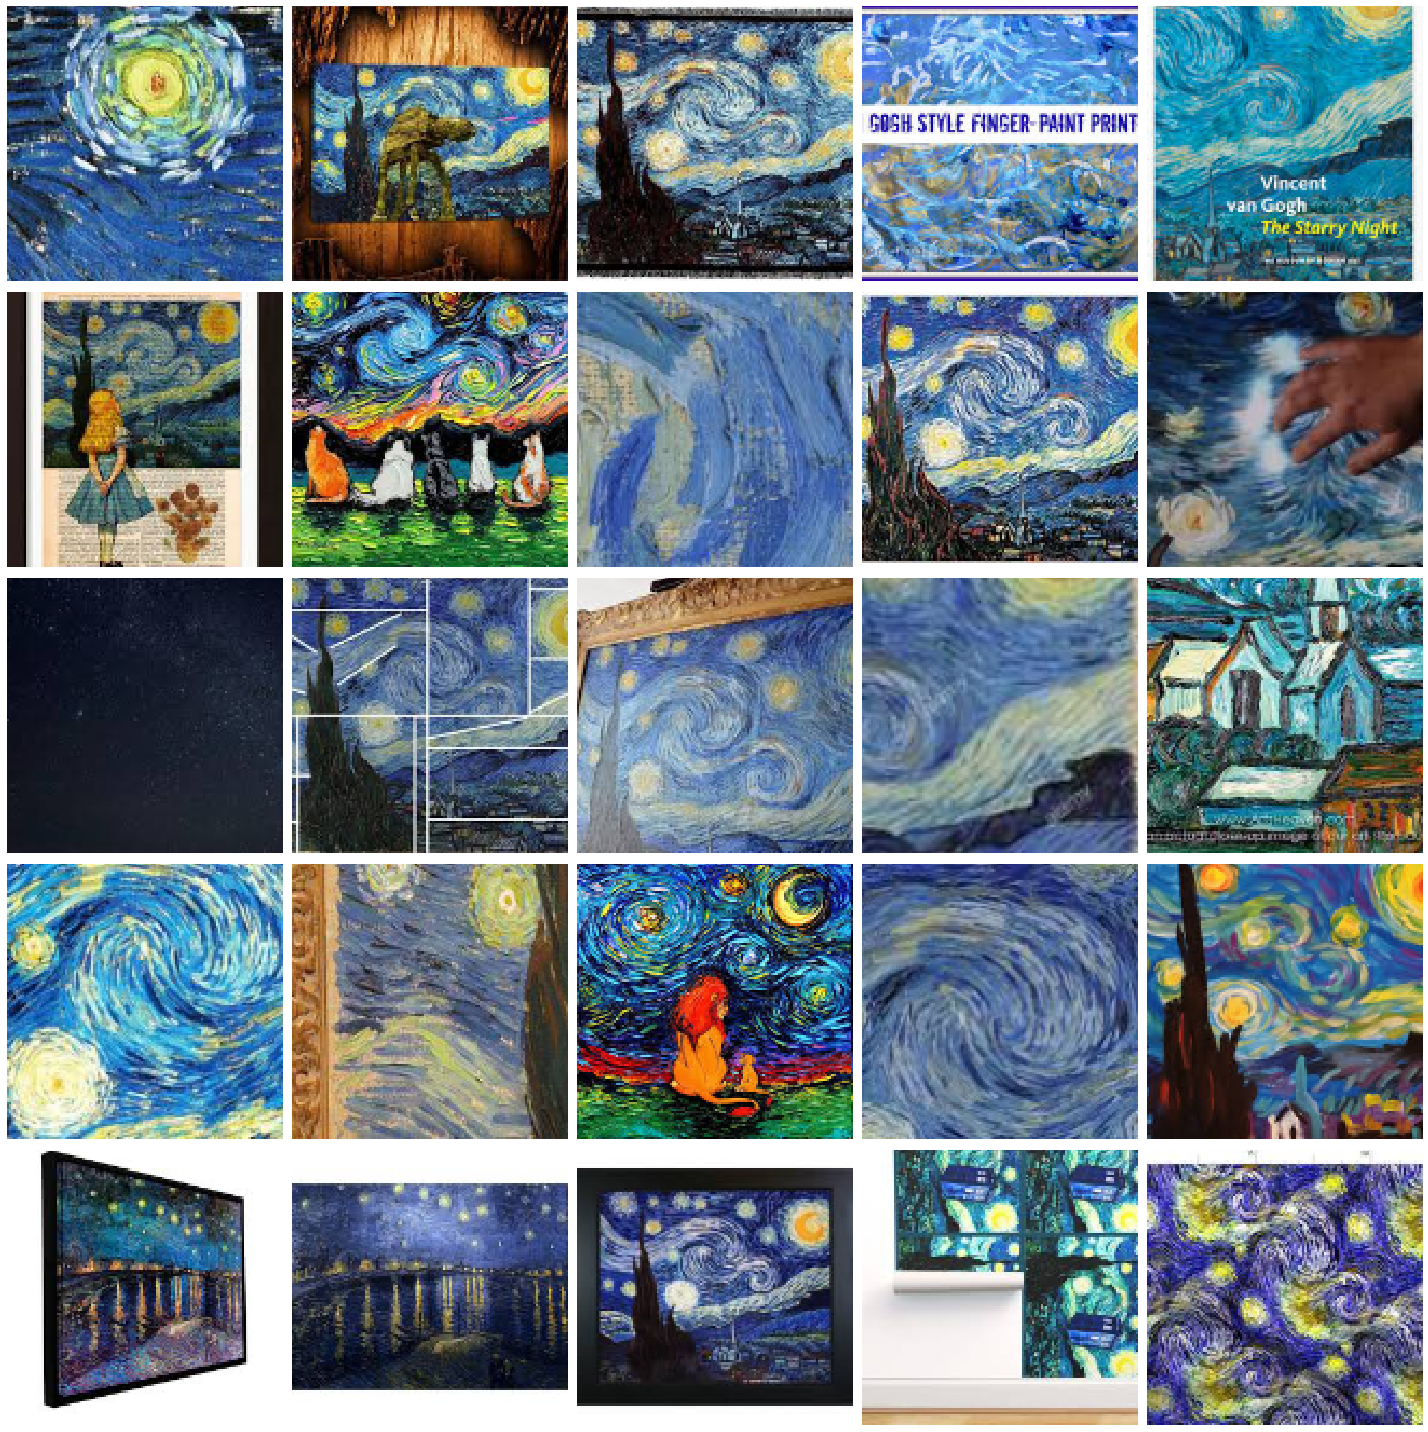

In [107]:
data.show_batch(rows=5)

In [0]:
generator=basic_generator(in_size=128,n_channels=3,noise_sz=128,n_extra_layers=1)
critic=basic_critic(in_size=128,n_channels=3, n_extra_layers=1)

In [0]:
learn=GANLearner.wgan(data, generator, critic, switch_eval=False,
                 opt_func=partial(optim.Adam,betas=(0.,0.99)),wd=0.)

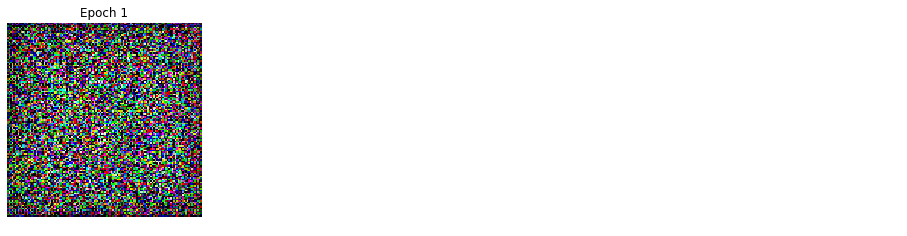

KeyboardInterrupt: ignored

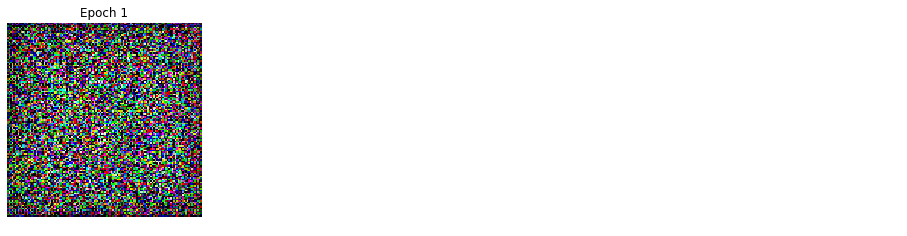

In [110]:
learn.fit(30,2e-4)